<a href="https://colab.research.google.com/github/ImranRiazChohan/Cat-and-Dog-Classification-CNN-/blob/master/Cat_and_Dog_Classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT SOME USEFULL LIBARARIES


In [92]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


## **Unzip data using python code:**
**The following python code will use the OS library, giving you access to the file system, and the zipfile library allowing you to unzip the data.**


In [93]:
# import zipfile
#local_zip = '/content/drive/My Drive/cat-and-dog.zip'

#zip_ref = zipfile.ZipFile(local_zip, 'r')

#zip_ref.extractall('/content')
#zip_ref.close()

# **Let's define the directories.**

### **Dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.**

In [94]:
mix_dir="./COYODOG"
test_dir="./COYODOG"
train_dir="./COYODOG"

train_dir_predict = "./COYODOG/trainy"

test_data = "./DATA/coyodogs"


In [95]:
train_dir_coyote=os.path.join(train_dir,"trainy/coyote")
train_dir_dog=os.path.join(train_dir,"trainy/dogs")

test_dir_coyote=os.path.join(test_dir,"validy/coyote")
test_dir_dog=os.path.join(test_dir,"validy/dogs")

In [96]:
train_coyote_fnames = os.listdir( train_dir_coyote )
train_dog_fnames = os.listdir( train_dir_dog )
test_coyote_fnames = os.listdir( test_dir_coyote )
test_dog_fnames = os.listdir( test_dir_dog )

print(train_coyote_fnames[:5])
print(train_dog_fnames[:5])
print(test_coyote_fnames[:5])
print(test_dog_fnames[:5]) 

print("Train data Coyote: ",len(os.listdir(train_dir_coyote)))
print("Train data Dogs: ",len(os.listdir(train_dir_dog)))

print("Test Data Coyote: ",len(os.listdir(test_dir_coyote)))
print("Test Data Dog: ",len(os.listdir(test_dir_dog))) 

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']
['cat.6535.jpg', 'cat.6539.jpg', 'cat.6555.jpg', 'cat.6558.jpg', 'cat.6569.jpg']
['dog.6172.jpg', 'dog.6180.jpg', 'dog.6194.jpg', 'dog.6217.jpg', 'dog.6225.jpg']
Train data Coyote:  300
Train data Dogs:  300
Test Data Coyote:  150
Test Data Dog:  150


## **Visualizing data:**
**Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:**

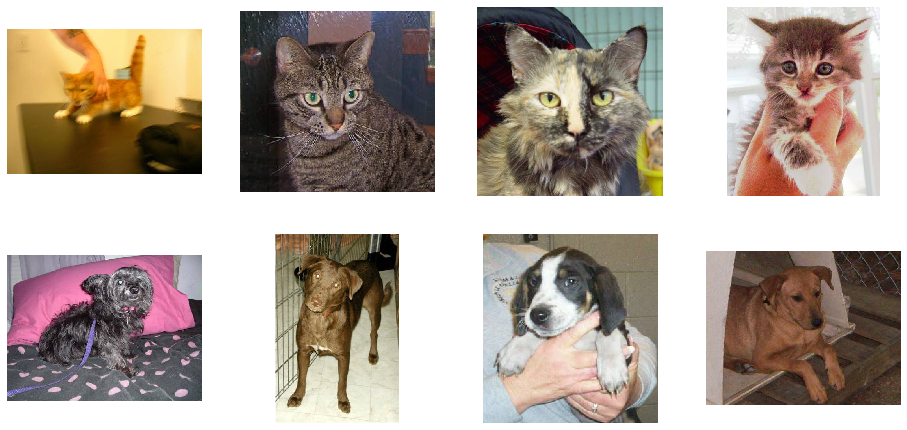

In [97]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_cat_pix = [os.path.join(train_dir_coyote, fname) 
                for fname in train_coyote_fnames[ pic_index-4:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dir_dog, fname) 
                for fname in train_dog_fnames[ pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

Create Small Model

In [98]:
def Create_model():
  model=tf.keras.models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation="relu"))
  model.add(layers.Dense(1,activation="sigmoid"))
  return model

In [99]:
model=Create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

### **compile model:**

We train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy. Using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [100]:
model.compile(tf.keras.optimizers.Adam(1e-4),tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

# **Image Data Processing**
Data preprocessing:

In keras it can be done via thekeras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [101]:
train_datagen=ImageDataGenerator(rescale=1.0/255,rotation_range=40,
            width_shift_range=0.2,height_shift_range=0.2,
            shear_range=0.2,zoom_range=0.2,
            horizontal_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [102]:
train_gen=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode="binary",target_size=(150,150))
validation_gen=test_datagen.flow_from_directory(test_dir,batch_size=20,class_mode="binary",target_size=(150,150))

Found 900 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


## **Train Model**

In [103]:
history=model.fit_generator(train_gen,epochs=3,steps_per_epoch=6,validation_data=validation_gen,validation_steps=20)

Epoch 1/3
6/6 [==============================] - 12s 2s/step - loss: 0.6773 - acc: 0.6250 - val_loss: 0.6615 - val_acc: 0.6425
Epoch 2/3
6/6 [==============================] - 9s 1s/step - loss: 0.6837 - acc: 0.5833 - val_loss: 0.6596 - val_acc: 0.6425
Epoch 3/3
6/6 [==============================] - 10s 2s/step - loss: 0.6367 - acc: 0.6750 - val_loss: 0.6721 - val_acc: 0.6425


In [104]:
model.save("smallmodel.h5")

## **Evaluating Accuracy and Loss for the Model:**

Let's plot the training/validation accuracy and loss as collected during training:

In [105]:
accuracy=history.history["acc"]
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']
epochs=range(len(accuracy))

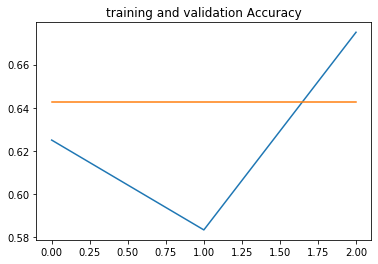

In [106]:
plt.plot(epochs,accuracy)
plt.plot(epochs,val_accuracy)
plt.title("training and validation Accuracy")
plt.show()

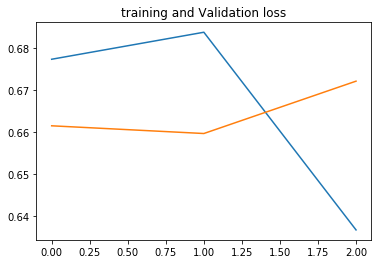

In [107]:
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("training and Validation loss")
plt.show()

## Create Large Scale Model

In [108]:
def Create_Large_model():
  model=tf.keras.models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
  model.add(layers.Conv2D(32,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(256,(3,3),activation='relu'))
  model.add(layers.Conv2D(256,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Conv2D(512,(3,3),activation='relu'))
  model.add(layers.MaxPool2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation="relu"))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1,activation="sigmoid"))
  return model

In [109]:
large_model=Create_Large_model()
large_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 128)      

In [110]:
large_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss="binary_crossentropy",metrics=['accuracy'])
History=large_model.fit_generator(train_gen,steps_per_epoch=6,epochs=6,validation_data=validation_gen,validation_steps=50)


Epoch 1/6
6/6 [==============================] - 44s 7s/step - loss: 0.6277 - acc: 0.6417 - val_loss: 0.6637 - val_acc: 0.6670
Epoch 2/6
6/6 [==============================] - 41s 7s/step - loss: 0.6594 - acc: 0.6417 - val_loss: 0.6380 - val_acc: 0.6620
Epoch 3/6
6/6 [==============================] - 41s 7s/step - loss: 0.6009 - acc: 0.7083 - val_loss: 0.7034 - val_acc: 0.6680
Epoch 4/6
6/6 [==============================] - 43s 7s/step - loss: 0.6780 - acc: 0.6333 - val_loss: 0.6373 - val_acc: 0.6640
Epoch 5/6
6/6 [==============================] - 42s 7s/step - loss: 0.6185 - acc: 0.7083 - val_loss: 0.6571 - val_acc: 0.6650
Epoch 6/6
6/6 [==============================] - 39s 6s/step - loss: 0.6510 - acc: 0.6833 - val_loss: 0.6408 - val_acc: 0.6600


In [111]:
Accuracy=History.history["acc"]
Loss=History.history['loss']
Val_accuracy=History.history['val_acc']
Val_loss=History.history['val_loss']
epochs=range(len(Accuracy))

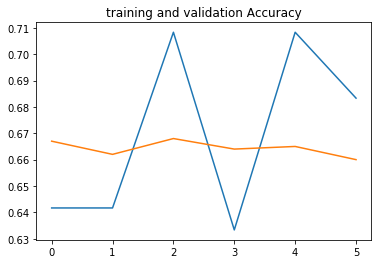

In [112]:
plt.plot(epochs,Accuracy)
plt.plot(epochs,Val_accuracy)
plt.title("training and validation Accuracy")
plt.show()

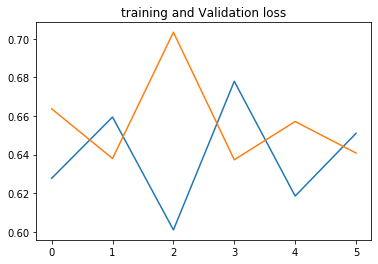

In [113]:
plt.plot(epochs,Loss)
plt.plot(epochs,Val_loss)
plt.title("training and Validation loss")
plt.show()

In [114]:
large_model.save("model.h5")

## Predictions

### Image Generator

In [115]:


Batch_size = 32
image_shape = 150



In [116]:
train_image_generator = ImageDataGenerator(
    # image augmentation
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True,
    rescale = 1./255 #normalize the image 
             )
test_image_generator = ImageDataGenerator(
    rescale = 1./255
             )


train_image_gen = train_image_generator.flow_from_directory(
batch_size = Batch_size,
directory = train_dir_predict,
shuffle = True,
target_size = (image_shape,image_shape),
class_mode= "binary")


test_image_gen =test_image_generator.flow_from_directory(
batch_size = Batch_size,
directory = test_dir,
shuffle = False,
target_size = (image_shape,image_shape),
class_mode= "binary")



Found 600 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [117]:
train_image_gen.class_indices

{'coyote': 0, 'dogs': 1}

In [118]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [119]:
image = load_img("DATA/18.jpg", target_size=(image_shape, image_shape)) # load image and resize it to target_size

In [120]:
type(image)

PIL.Image.Image

In [121]:
img = img_to_array(image)

In [122]:
type(img)

numpy.ndarray

In [123]:
print(img.shape)

(150, 150, 3)


In [124]:
img = np.expand_dims(img, 0) # to add batch dimension.

In [125]:
img = img.astype(np.float32)/255.0 # normalize image

In [126]:
print(img.shape)

(1, 150, 150, 3)


### Predictions

In [127]:
model.predict(img)

array([[0.2462859]], dtype=float32)

In [128]:
img0 = load_img("DATA/2.jpg",target_size=(image_shape,image_shape))
img0 = img_to_array(img0)
img0 = np.expand_dims(img0,0)
img0 = img0.astype(np.float32)/255.0
model.predict(img0)

array([[0.23278925]], dtype=float32)

In [129]:
def load_images(folder):
    outputs = []
    for f in os.listdir(folder):
        print(f)
        img = load_img(os.path.join(folder, f),target_size=(image_shape,image_shape))
        img = img_to_array(img)
        img = np.expand_dims(img,0)
        img = img.astype(np.float32)/255.0
        outputs.append(img)
    return np.concatenate(outputs)

In [130]:


def predict_classes(model, images, classes):
    output = []
    prediction = model.predict(images)

    class_label = {value:key for key, value in classes.items()}
    for p in prediction:
        if p> 0.5:
            output.append(class_label[1])
        else:
            output.append(class_label[0])
    return output



In [131]:
images = load_images("./DATA/minicoyo")

10.jpg
11.jpg
13.jpg
15.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
23.jpg


In [132]:
predict_classes(model, images, train_image_gen.class_indices)

['coyote',
 'coyote',
 'coyote',
 'coyote',
 'coyote',
 'coyote',
 'coyote',
 'coyote',
 'coyote',
 'coyote']

###  Now Plot Images

In [133]:
def predict_and_plot(model, image_folder):
    class2index = train_image_gen.class_indices
    index2class = {value:key for key, value in class2index.items()}
    image_files = os.listdir(image_folder)
    fig,axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for i in range(len(image_files)):
        image_file = image_files[i]
        img = load_img(os.path.join(image_folder, image_file),target_size=(image_shape,image_shape))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array,0)
        img_array = img_array.astype(np.float32)/255.0
        
        prediction = model.predict_classes(img_array.reshape(-1, image_shape, image_shape, 3))[0][0]

        axes[i].set_title("predicted:"+index2class[prediction])
        img_array = img_to_array(img)
        
        axes[i].imshow(img_array.astype(np.uint8))
        plt.tight_layout()
 
    
        
    plt.show()

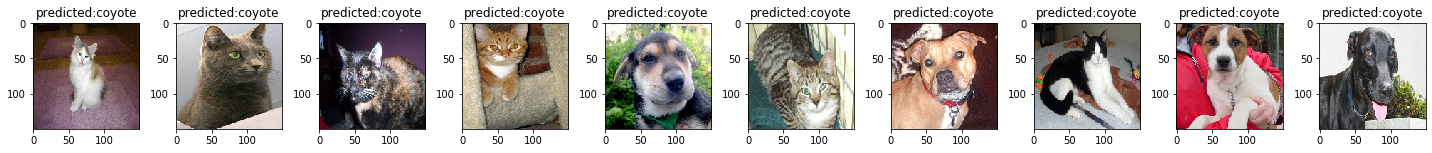

In [134]:
predict_and_plot(model, "./DATA/minicoyo")